# Upload training file and necessary preprocessing

In [1]:
from google.colab import files
uploaded = files.upload()

Saving EXIST2023_dev.json to EXIST2023_dev.json
Saving EXIST2023_test_clean.json to EXIST2023_test_clean.json
Saving EXIST2023_training.json to EXIST2023_training.json


## Pre-Requisits

In [1]:
# !pip install langdetect
!pip install numpy==1.23.5
!pip install -q -U "tensorflow-text==2.11.*"
!pip install -q tf-models-official==2.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.1/630.1 kB 33.0 MB/s eta 0:00:00


In [2]:
# from langdetect import detect
import pandas as pd
import numpy as np

training_set = pd.read_json("EXIST2023_training.json")
dev_set = pd.read_json("EXIST2023_dev.json")
test_set = pd.read_json("EXIST2023_test_clean.json")

## Preparing the dataset 

In [3]:
tweets_d = []
labels_d = []
sexism_d = []
tLabels_d = []
sLabels_d = []
otherLang_d = 0
english_d = 0
id_d = []
sexId_d = []

for i in dev_set:  
  countY = 0
  countN = 0

  # if detect(df[i].tweet) == 'en':
  #   english +=1
  # else:
  #   otherLang +=1
  #   continue

  if (i < 200000) or (i >= 203260 and i <=400001) :
    continue
  id_d.append(int(i))
  # print(detect(df[i].tweet))
  tweets_d.append(dev_set[i].tweet)

  for l in dev_set[i].labels_task1:
    if l == 'YES':
      countY +=1
    if l == 'NO':
      countN +=1
  if countY == countN :
    labels_d.append(-1)
  elif countY > countN:
    labels_d.append(1)
    sexId_d.append(i)
    sexism_d.append(dev_set[i].tweet)
    tune = {
        "REPORTED": 0, "JUDGEMENTAL": 0, "DIRECT": 0
    }
    sense = {
        "MISOGYNY-NON-SEXUAL-VIOLENCE":0,
        "IDEOLOGICAL-INEQUALITY": 0, 
        "STEREOTYPING-DOMINANCE": 0, 
        "OBJECTIFICATION": 0, 
        "SEXUAL-VIOLENCE":0, 
        "-1":0
    }
    for m in dev_set[i].labels_task2:
      if m == 'REPORTED':
        tune["REPORTED"] +=1
      if m == 'JUDGEMENTAL':
        tune["JUDGEMENTAL"] +=1
      if m == 'DIRECT':
        tune["DIRECT"] +=1 
    tLabels_d.append(max(tune, key=tune.get))

    for n in dev_set[i].labels_task3:

      if n[0] == 'MISOGYNY-NON-SEXUAL-VIOLENCE':
        sense["MISOGYNY-NON-SEXUAL-VIOLENCE"] +=1
      if n[0] == 'IDEOLOGICAL-INEQUALITY':
        sense["IDEOLOGICAL-INEQUALITY"] +=1
      if n[0] == 'STEREOTYPING-DOMINANCE':
        sense["STEREOTYPING-DOMINANCE"] +=1
      if n[0] == 'OBJECTIFICATION':
        sense["OBJECTIFICATION"] +=1
      if n[0] == 'SEXUAL-VIOLENCE':
        sense["SEXUAL-VIOLENCE"] +=1
      if n[0] == '-':
        sense["-1"] +=1

    sLabels_d.append(max(sense, key=sense.get))
  else:
    labels_d.append(0)



In [4]:
tweets = []
labels = []
sexism = []
tLabels = []
sLabels = []
otherLang = 0
english = 0
id = []
sexId = []

for i in training_set :  
  countY = 0
  countN = 0

  # if detect(df[i].tweet) == 'en':
  #   english +=1
  # else:
  #   otherLang +=1
  #   continue

  if (i < 200000) or (i >= 203260 and i <=400001) :
    continue
  id.append(int(i))
  # print(detect(df[i].tweet))
  tweets.append(training_set[i].tweet)


  for l in training_set[i].labels_task1:
    if l == 'YES':
      countY +=1
    if l == 'NO':
      countN +=1
  if countY == countN :
    labels.append(-1)
  elif countY > countN:
    labels.append(1)
    sexId.append(i)
    sexism.append(training_set[i].tweet)
    tune = {
        "REPORTED": 0, "JUDGEMENTAL": 0, "DIRECT": 0
    }
    sense = {
        "MISOGYNY-NON-SEXUAL-VIOLENCE":0,
        "IDEOLOGICAL-INEQUALITY": 0, 
        "STEREOTYPING-DOMINANCE": 0, 
        "OBJECTIFICATION": 0, 
        "SEXUAL-VIOLENCE":0, 
        "-1":0
    }
    for m in training_set[i].labels_task2:
      if m == 'REPORTED':
        tune["REPORTED"] +=1
      if m == 'JUDGEMENTAL':
        tune["JUDGEMENTAL"] +=1
      if m == 'DIRECT':
        tune["DIRECT"] +=1 
    tLabels.append(max(tune, key=tune.get))

    for n in training_set[i].labels_task3:

      if n[0] == 'MISOGYNY-NON-SEXUAL-VIOLENCE':
        sense["MISOGYNY-NON-SEXUAL-VIOLENCE"] +=1
      if n[0] == 'IDEOLOGICAL-INEQUALITY':
        sense["IDEOLOGICAL-INEQUALITY"] +=1
      if n[0] == 'STEREOTYPING-DOMINANCE':
        sense["STEREOTYPING-DOMINANCE"] +=1
      if n[0] == 'OBJECTIFICATION':
        sense["OBJECTIFICATION"] +=1
      if n[0] == 'SEXUAL-VIOLENCE':
        sense["SEXUAL-VIOLENCE"] +=1
      if n[0] == '-':
        sense["-1"] +=1

    sLabels.append(max(sense, key=sense.get))
  else:
    labels.append(0)


# print("English tweets ", english)
# print("Other tweets ", otherLang)

In [5]:
test_tweets = []
tweet_id_t = []
for i in test_set:
  if i < 600000:
    continue
  tweet_id_t.append(i)
  test_tweets.append(test_set[i].tweet)

## Put the dataset into dataframe

In [6]:
df_tweets = pd.DataFrame(
    {'id': id,
     'tweets': tweets,
    })

df_sexism = pd.DataFrame(
    {'id': sexId,
     'sexism': sexism,
    })

dev_tweets = pd.DataFrame( 
    {
        'id': id_d,
     'tweets': tweets_d,
    })

dev_sexism = pd.DataFrame(
    {'id': sexId_d,
     'sexism': sexism_d,
    })

test_set = pd.DataFrame(
    {
        "id": tweet_id_t,
        "tweet": test_tweets
    }
)


## Preprocessing the Tweets

In [7]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

## 1. Removal of punctuation and capitlization
## 2. Tokenizing
## 3. Removal of stopwords
## 4. Stemming

stopwords = nltk.corpus.stopwords.words("english")

#extending the stopwords to include other words used in twitter such as retweet(rt) etc.
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
stemmer = PorterStemmer()

def data_cleansing(tweet):  
    
    # removal of extra spaces
    re_pattern = re.compile(r'\s+')
    spaceRefined = tweet.str.replace(re_pattern, ' ')

    # removal of @name[mention]
    re_pattern = re.compile(r'@[\w\-]+')
    usernameRefined = spaceRefined.str.replace(re_pattern, '')

    # removal of links[https://abc.com]
    re_pattern =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets = usernameRefined.str.replace(re_pattern, '')
    
    # removal of punctuations and numbers
    puncRefined = tweets.str.replace("[^a-zA-Z]", " ")
    # remove whitespace with a single space
    newtweet = puncRefined.str.replace(r'\s+', ' ')
    # remove leading and trailing whitespace
    newtweet = newtweet.str.replace(r'^\s+|\s+?$','')
    # replace normal numbers with numbr
    newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')
    # removal of capitalization
    tweet_lower = newtweet.str.lower()
    
    # tokenizing
    tokenized_tweet = tweet_lower.apply(lambda x: x.split())
    
    # removal of stopwords
    tokenized_tweet=  tokenized_tweet.apply(lambda x: [item for item in x if item not in stopwords])
    
    # stemming of the tweets
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
    
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tweets_p= tokenized_tweet
    
    return tweets_p

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
refinedTweets = data_cleansing(df_tweets.tweets)   
df_tweets['processed_tweets'] = refinedTweets
print(df_tweets[["tweets","processed_tweets"]].head(10))

<ipython-input-7-8b565ef38886>:35: FutureWarning: The default value of regex will change from True to False in a future version.
  puncRefined = tweets.str.replace("[^a-zA-Z]", " ")
<ipython-input-7-8b565ef38886>:37: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet = puncRefined.str.replace(r'\s+', ' ')
<ipython-input-7-8b565ef38886>:39: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet = newtweet.str.replace(r'^\s+|\s+?$','')
<ipython-input-7-8b565ef38886>:41: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')


                                              tweets  \
0  FFS! How about laying the blame on the bastard...   
1  Writing a uni essay in my local pub with a cof...   
2  @UniversalORL it is 2021 not 1921. I dont appr...   
3  @GMB this is unacceptable. Use her title as yo...   
4  ‘Making yourself a harder target’ basically bo...   
5  According to a customer I have plenty of time ...   
6  So only 'blokes' drink beer? Sorry, but if you...   
7  New to the shelves this week - looking forward...   
8  #EverydaySexism We can &amp; need to do better...   
9  I guess that’s fairly normal for a Neanderthal...   

                                    processed_tweets  
0        ff lay blame bastard murder novel idea know  
1  write uni essay local pub coffe random old man...  
2  dont appreci two ride team member look behind ...  
3  unaccept use titl men interview fact senior an...  
4  make harder target basic boil make sure target...  
5  accord custom plenti time go spent stirl coin ... 

In [9]:
refinedTweets = data_cleansing(dev_tweets.tweets)   
dev_tweets['processed_tweets'] = refinedTweets
print(dev_tweets[["tweets","processed_tweets"]].head(10))

<ipython-input-7-8b565ef38886>:35: FutureWarning: The default value of regex will change from True to False in a future version.
  puncRefined = tweets.str.replace("[^a-zA-Z]", " ")
<ipython-input-7-8b565ef38886>:37: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet = puncRefined.str.replace(r'\s+', ' ')
<ipython-input-7-8b565ef38886>:39: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet = newtweet.str.replace(r'^\s+|\s+?$','')
<ipython-input-7-8b565ef38886>:41: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')


                                              tweets  \
0  @BBCWomansHour @LabWomenDec @EverydaySexism Sh...   
1  #everydaysexism Some man moving my suitcase in...   
2  @KolHue @OliverJia1014 lol gamergate the go to...   
3  @ShelfStoriesGBL To me this has the same negat...   
4  @IrrelevantCmnt @jbo911 @BanButterfly @TheRigh...   
5  @cathymwafer @andrew_lilico Showing off? The m...   
6  @ReproRights @AbortionStories Getting Twitter ...   
7  @shields_rex @good_jarvis4 @Lulu48005877 @Mart...   
8  @punishedmother There could be an opportunity ...   
9  @esjayXX @EcuadorianMum @monsalore They so rem...   

                                    processed_tweets  
0  right push opposit direct convert femal space ...  
1  everydaysex man move suitcas overhead luggag s...  
2  lol gamerg go boogieman mayb actual concern br...  
3  neg gamerg peopl want act like journalist ethi...  
4  yeah core meme pre gamerg era build cultur amo...  
5  show man spend money help economi hope coupl h... 

In [10]:
refinedTweets = data_cleansing(df_sexism.sexism)   
df_sexism['processed_tweets'] = refinedTweets
print(df_sexism[["sexism","processed_tweets"]].head(10))

<ipython-input-7-8b565ef38886>:35: FutureWarning: The default value of regex will change from True to False in a future version.
  puncRefined = tweets.str.replace("[^a-zA-Z]", " ")
<ipython-input-7-8b565ef38886>:37: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet = puncRefined.str.replace(r'\s+', ' ')
<ipython-input-7-8b565ef38886>:39: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet = newtweet.str.replace(r'^\s+|\s+?$','')
<ipython-input-7-8b565ef38886>:41: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')


                                              sexism  \
0  Writing a uni essay in my local pub with a cof...   
1  @UniversalORL it is 2021 not 1921. I dont appr...   
2  According to a customer I have plenty of time ...   
3  So only 'blokes' drink beer? Sorry, but if you...   
4  #EverydaySexism means women usually end up in ...   
5  @orlamuldoon @NWCI @IrishRunnerMag @ReclaimTS ...   
6  @MarkPaulTimes @colettebrowne #EveryDaySexism ...   
7  @RMatthewsPsyEdu @ITV @jamesmartinchef @Everyd...   
8  @Geek_Pride @kathrynstimpson @medicalpoke @Eve...   
9  February 28, 2022: Daily Mail website voyeuris...   

                                    processed_tweets  
0  write uni essay local pub coffe random old man...  
1  dont appreci two ride team member look behind ...  
2  accord custom plenti time go spent stirl coin ...  
3  bloke drink beer sorri bloke drink wine appar ...  
4  everydaysex mean women usual end lower paid su...  
5  hi orla interest piec polici respons believ ea... 

In [11]:
refinedTweets = data_cleansing(dev_sexism.sexism)   
dev_sexism['processed_tweets'] = refinedTweets
print(dev_sexism[["sexism","processed_tweets"]].head(10))

                                              sexism  \
0  @BBCWomansHour @LabWomenDec @EverydaySexism Sh...   
1  #everydaysexism Some man moving my suitcase in...   
2  @ReproRights @AbortionStories Getting Twitter ...   
3  @esjayXX @EcuadorianMum @monsalore They so rem...   
4  One of the depressing things about #NotAllMen ...   
5  Shit is crazy. If u want an open relationship,...   
6  @GoldenSteeler06 @Matthew07219782 @PocketMaxim...   
7  I sincerely wish the US was this progressive o...   
8  #GOP raising Taxes and controlling #WomensRigh...   
9  Freedom convoy Toronto waving Pro-Life flag.Th...   

                                    processed_tweets  
0  right push opposit direct convert femal space ...  
1  everydaysex man move suitcas overhead luggag s...  
2                       get twitter harass pro choic  
3  remind mgtow men go way us full men hate women...  
4  one depress thing notallmen use primarili rall...  
5  shit crazi u want open relationship go find so... 

<ipython-input-7-8b565ef38886>:35: FutureWarning: The default value of regex will change from True to False in a future version.
  puncRefined = tweets.str.replace("[^a-zA-Z]", " ")
<ipython-input-7-8b565ef38886>:37: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet = puncRefined.str.replace(r'\s+', ' ')
<ipython-input-7-8b565ef38886>:39: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet = newtweet.str.replace(r'^\s+|\s+?$','')
<ipython-input-7-8b565ef38886>:41: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')


In [12]:
refinedTweets = data_cleansing(test_set.tweet)   
test_set['processed_tweets'] = refinedTweets
print(test_set[["tweet","processed_tweets"]].head(10))

<ipython-input-7-8b565ef38886>:35: FutureWarning: The default value of regex will change from True to False in a future version.
  puncRefined = tweets.str.replace("[^a-zA-Z]", " ")
<ipython-input-7-8b565ef38886>:37: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet = puncRefined.str.replace(r'\s+', ' ')
<ipython-input-7-8b565ef38886>:39: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet = newtweet.str.replace(r'^\s+|\s+?$','')
<ipython-input-7-8b565ef38886>:41: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')


                                               tweet  \
0  @BrianRoemmele @profgalloway This is a BS, man...   
1  @Cathy_TwoHalves @EverydaySexism That's why wo...   
2  @betweenstardust Please be our voice.@CNN @cnn...   
3  @JonPincince @kmulvane @EverydaySexism, even a...   
4  Seriously @JohnLewisRetail?  girls are picture...   
5  not a great look for the French Cycling Federa...   
6  Any of y'all remember that law and order episo...   
7  It's funny how you could replace 'Andrew Tate'...   
8  Bannon started with #GamerGate. @BrietbartNews...   
9  @chrisfogIe man imagine being a teenager durin...   

                                    processed_tweets  
0  bs manospher comment shock see mayb cover nons...  
1  women stay home rais children take care hous n...  
2                                         pleas voic  
3                       even roe v wade overturn fun  
4  serious girl pictur stylist doll pizza oven bo...  
5           great look french cycl feder everydaysex 

## Putting the labels into dataframe

In [13]:
df_sexism['label'] = sLabels
df_tweets['label'] = labels
dev_sexism['label'] = sLabels_d
dev_tweets['label'] = labels_d


# Visualization of all tweets in the dataset and Sexism Tweets

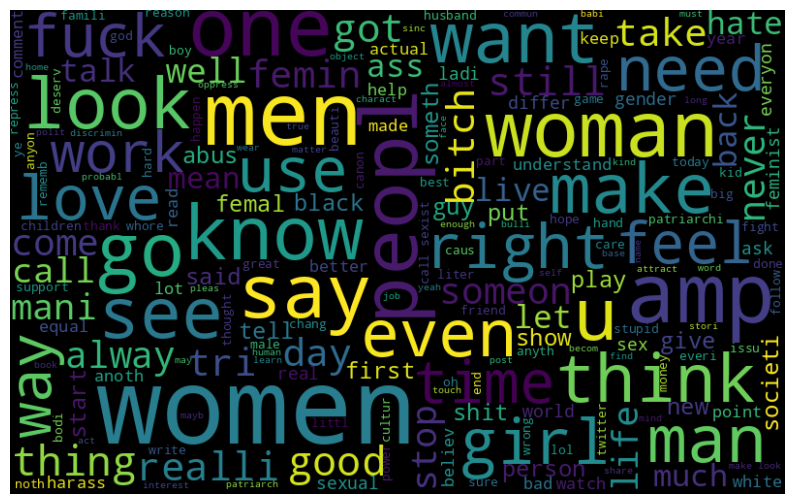

In [14]:
# visualizing which of the word is most commonly used in the dataset
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_words = ' '.join([word for word in df_tweets['processed_tweets'] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

#random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

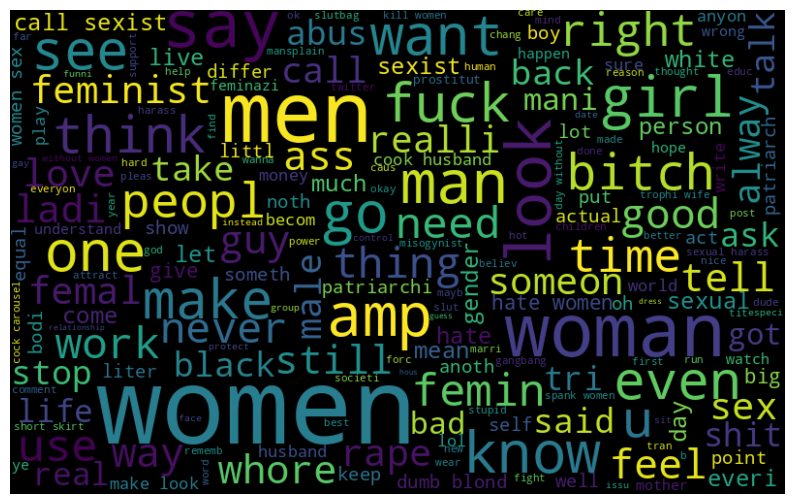

In [15]:
# visualizing which of the word is most commonly used in the dataset
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_words = ' '.join([word for word in df_sexism['processed_tweets'] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

#random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Preparing dataset labels for Machine Learning Algorithms

## Data Labelling

In [16]:
df_tweets = df_tweets[df_tweets['label'] != -1]
df_tweets['label'].value_counts()

0    1733
1    1136
Name: label, dtype: int64

In [17]:
dev_tweets = dev_tweets[dev_tweets['label'] != -1]
dev_tweets['label'].value_counts()

0    249
1    194
Name: label, dtype: int64

In [18]:
df_sexism = df_sexism[df_sexism['label'] != "-1"]
df_sexism['label'].value_counts()

IDEOLOGICAL-INEQUALITY          405
STEREOTYPING-DOMINANCE          286
OBJECTIFICATION                 203
MISOGYNY-NON-SEXUAL-VIOLENCE    119
SEXUAL-VIOLENCE                 102
Name: label, dtype: int64

In [19]:
dev_sexism = dev_sexism[dev_sexism['label'] != "-1"]
dev_sexism['label'].value_counts()

IDEOLOGICAL-INEQUALITY          78
STEREOTYPING-DOMINANCE          48
OBJECTIFICATION                 32
MISOGYNY-NON-SEXUAL-VIOLENCE    19
SEXUAL-VIOLENCE                 15
Name: label, dtype: int64

In [20]:
df_sexism['label']=df_sexism['label'].replace('IDEOLOGICAL-INEQUALITY', 0)
df_sexism['label']=df_sexism['label'].replace('STEREOTYPING-DOMINANCE', 1)
df_sexism['label']=df_sexism['label'].replace('OBJECTIFICATION', 2)
df_sexism['label']=df_sexism['label'].replace('MISOGYNY-NON-SEXUAL-VIOLENCE', 3)
df_sexism['label']=df_sexism['label'].replace('SEXUAL-VIOLENCE', 4)
df_sexism['label'].value_counts()

0    405
1    286
2    203
3    119
4    102
Name: label, dtype: int64

In [21]:
dev_sexism['label']=dev_sexism['label'].replace('IDEOLOGICAL-INEQUALITY', 0)
dev_sexism['label']=dev_sexism['label'].replace('STEREOTYPING-DOMINANCE', 1)
dev_sexism['label']=dev_sexism['label'].replace('OBJECTIFICATION', 2)
dev_sexism['label']=dev_sexism['label'].replace('MISOGYNY-NON-SEXUAL-VIOLENCE', 3)
dev_sexism['label']=dev_sexism['label'].replace('SEXUAL-VIOLENCE', 4)
dev_sexism['label'].value_counts()

0    78
1    48
2    32
3    19
4    15
Name: label, dtype: int64

## Word Embedding using TF-IDF

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)
tfidf = tfidf_vectorizer.fit_transform(df_tweets['processed_tweets'])

print(tfidf.shape)

X = tfidf
y = df_tweets['label'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

(2869, 1643)


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

tfidf_vectorizer_dev = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)
tfidf_dev = tfidf_vectorizer_dev.fit_transform(dev_tweets['processed_tweets'])

print(tfidf_dev.shape)

X_dev = tfidf_dev
y_dev = dev_tweets['label'].astype(int)
X_dev_train_tfidf, X_dev_test_tfidf, y_dev_train, y_dev_test = train_test_split(X_dev, y_dev, random_state=42, test_size=0.1)

(443, 260)


## Hyperparameter tuning of Random Forest

### Hyperparameter Tuning- RandomizedSearchCV

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [25]:
random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   random_grid)
random_search.fit(X_dev_train_tfidf, y_dev_train)

In [26]:
print(random_search.best_estimator_)

RandomForestClassifier(bootstrap=False, max_depth=80, max_features='auto',
                       min_samples_leaf=4, n_estimators=1200)


I used these hyperparameters in the section random forest with hyperparameter tuning below in task 1

# Task 1: Sexism Detection

### Random Forest ( By Default Hyper Parameter Tuning )

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf=RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
y_preds = rf.predict(X_test_tfidf)
# acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
# print("Random Forest, Accuracy Score:",acc1)
rfAccuracy = 100 * accuracy_score(y_test, y_preds)

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       179
           1       0.74      0.67      0.70       108

    accuracy                           0.79       287
   macro avg       0.78      0.76      0.77       287
weighted avg       0.78      0.79      0.78       287



## Random Forest ( With Hyperparameter tuning using Random-Search method) 

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf1=RandomForestClassifier(bootstrap=False, max_depth=80, max_features='auto',
                       min_samples_leaf=4, n_estimators=1800)
rf1.fit(X_train_tfidf,y_train)
y_preds = rf1.predict(X_test_tfidf)
# acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
# print("Random Forest, Accuracy Score:",acc1)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       0.81      0.85      0.83       179
           1       0.73      0.67      0.70       108

    accuracy                           0.78       287
   macro avg       0.77      0.76      0.77       287
weighted avg       0.78      0.78      0.78       287



## Feeding Dataset to Bert Model


In [35]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

from sklearn.model_selection import train_test_split
X = np.array(df_tweets.tweets)
y = np.array(df_tweets['label'].astype(int))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' 

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')



BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [36]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [37]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(X_test))
# print(tf.sigmoid(bert_raw_result))
tf.keras.utils.plot_model(classifier_model)

# Initializing the loss
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.binary_accuracy

# Epochs Setting
epochs = 5
steps_per_epoch = 10
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr, num_train_steps=num_train_steps, num_warmup_steps=num_warmup_steps, optimizer_type='adamw')

In [40]:
classifier_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
print(f'Training model with {tfhub_handle_encoder}')

# Uncomment the line below for training purpose
# history = classifier_model.fit(X_train,y_train,epochs=epochs)
loss, accuracy = classifier_model.evaluate(X_test, y_test)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
9/9 [==============================] - 65s 7s/step - loss: 0.6270 - binary_accuracy: 0.6237


In [41]:
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

Loss: 0.6269954442977905
Accuracy: 0.6236934065818787


## Comparsion b/w Random Forest and Bert

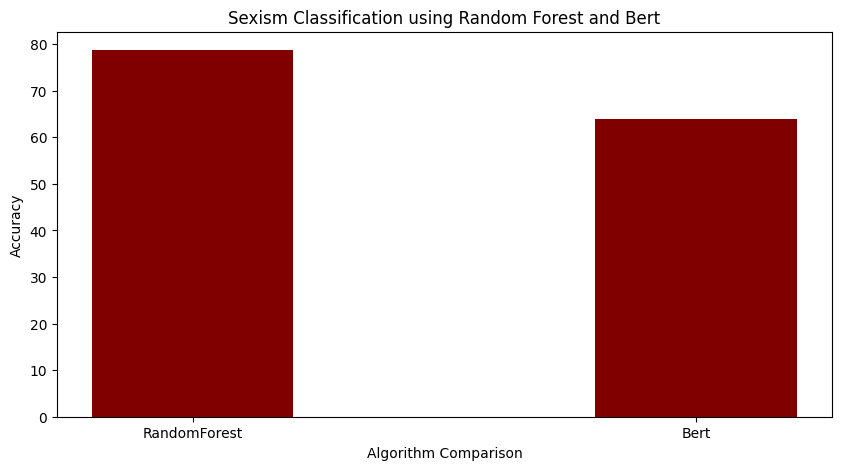

In [49]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'RandomForest':rfAccuracy, 'Bert': accuracy * 100, }
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
		width = 0.4)

plt.xlabel("Algorithm Comparison")
plt.ylabel("Accuracy")
plt.title("Sexism Classification using Random Forest and Bert")
plt.show()


## Result Generation

In [32]:
sexismCategorization = []

result_Task1_Both_Labels = [] 
for id, tweets in test_set.iterrows():
  Test = tfidf_vectorizer.transform(np.array([str(tweets['processed_tweets'])]))
  hardLabel = rf.predict(Test)
  softLabel = rf.predict_proba(Test)
  
  if hardLabel[0] == 1:
    sexismCategorization.append([tweets.id, tweets['processed_tweets']])

  sub = {
      str(tweets.id):
      {
        "Hard Label": "Yes" if hardLabel[0] == 1 else "NO",
        "Soft Label": {"Yes":softLabel[0][1], "No": softLabel[0][0] }
      }
  }
  result_Task1_Both_Labels.append(sub)

In [68]:
import json

with open('Test_set Task 1.json', 'w') as f:
  json.dump(result_Task1_Both_Labels ,f)


### Storing the Trained Model

In [ ]:
import pickle
pickle.dump(rf, open('Trained_Model_Task1.pkl', 'wb'))

### Loading the Stored Model

In [ ]:
pickled_model = pickle.load(open('Trained_Model_Task1.pkl', 'rb'))
y_preds = pickled_model.predict(X_test_tfidf)
report = classification_report( y_test, y_preds )
print(report)

# Task 3: Sexism Categorization


## Tf-Idf Conversion

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)
tfidf = tfidf_vectorizer.fit_transform(df_sexism['processed_tweets'])

print(tfidf.shape)

X = tfidf
y = df_sexism['label'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

(1115, 730)


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

tfidf_vectorizer_dev = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)
tfidf_dev = tfidf_vectorizer_dev.fit_transform(dev_sexism['processed_tweets'])

print(tfidf_dev.shape)

X_d = tfidf_dev
y_d = dev_sexism['label'].astype(int)
X_dev_train_tfidf, X_dev_test_tfidf, y_dev_train, y_dev_test = train_test_split(X_d, y_d, random_state=42, test_size=0.1)

(192, 77)


In [39]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression().fit(X_train_tfidf,y_train)
# y_preds = model.predict(X_test_tfidf)
# report = classification_report( y_test, y_preds )

# print(report)

## Hyperparameter Tuning of Random Forest

In [40]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


### Hyperparameter Tuning -RandomizedSearchCV

In [ ]:
random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   random_grid)
random_search.fit(X_dev_train_tfidf, y_dev_train)

I used these parameter in the section Random-Forest-with Hyperparameter tuning

In [73]:
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=10, max_features='auto', min_samples_split=10,
                       n_estimators=1400)


## Random Forest ( By default Hyperparameter Tuning)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf=RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
y_preds = rf.predict(X_test_tfidf)
# acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
# print("Random Forest, Accuracy Score:",acc1)

rfAccuracy1 = 100 * accuracy_score(y_test, y_preds)

              precision    recall  f1-score   support

           0       0.60      0.76      0.67        42
           1       0.39      0.38      0.39        29
           2       0.67      0.43      0.53        23
           3       0.75      0.46      0.57        13
           4       0.50      0.80      0.62         5

    accuracy                           0.56       112
   macro avg       0.58      0.57      0.55       112
weighted avg       0.57      0.56      0.55       112



## Random Forest ( With Hyperparameter Tuning ) 

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf1=RandomForestClassifier(bootstrap=False, max_depth=40, max_features='auto',
                       min_samples_leaf=4, n_estimators=1600)
rf1.fit(X_train_tfidf,y_train)
y_preds = rf1.predict(X_test_tfidf)
# acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
# print("Random Forest, Accuracy Score:",acc1)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       0.56      0.81      0.66        42
           1       0.52      0.41      0.46        29
           2       0.69      0.39      0.50        23
           3       0.50      0.31      0.38        13
           4       0.29      0.40      0.33         5

    accuracy                           0.54       112
   macro avg       0.51      0.46      0.47       112
weighted avg       0.56      0.54      0.53       112



## Feeding Sexism Categorization to Bert

In [85]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

from sklearn.model_selection import train_test_split
X = np.array(df_sexism.sexism)
y = np.array(df_sexism['label'].astype(int))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' 

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [86]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [87]:
# classifier_model = build_classifier_model()
# bert_raw_result = classifier_model(tf.constant(X_test))
# print(tf.sigmoid(bert_raw_result))
tf.keras.utils.plot_model(classifier_model)

# Initializing the loss
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.binary_accuracy

# Epochs Setting
epochs = 5
steps_per_epoch = 10
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr, num_train_steps=num_train_steps, num_warmup_steps=num_warmup_steps, optimizer_type='adamw')

In [89]:
classifier_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
print(f'Training model with {tfhub_handle_encoder}')

history = classifier_model.fit(X_train, y_train, epochs=2, batch_size=32)
loss1, accuracy1 = classifier_model.evaluate(X_test, y_test)


Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/2
28/28 [==============================] - 266s 9s/step - loss: -3.2901 - binary_accuracy: 0.2590
Epoch 2/2
7/7 [==============================] - 18s 2s/step - loss: -3.2599 - binary_accuracy: 0.2466


In [90]:
print(f'Loss: {loss1}')
print(f'Accuracy: {accuracy1}')

Loss: -3.259864330291748
Accuracy: 0.2466367781162262


## Comparsion between Random Forest and Bert Task 3

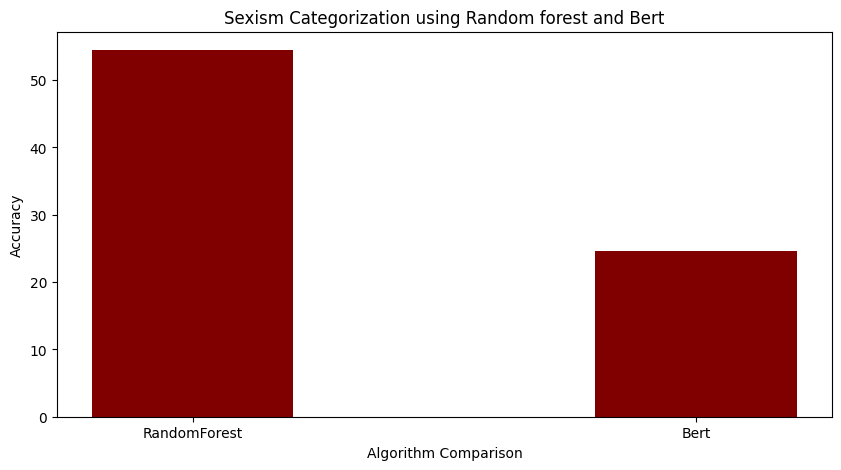

In [91]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'RandomForest':rfAccuracy1, 'Bert':accuracy1 * 100, }
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
		width = 0.4)

plt.xlabel("Algorithm Comparison")
plt.ylabel("Accuracy")
plt.title("Sexism Categorization using Random forest and Bert")
plt.show()


## Generating Results

### Storing the Trained Model

In [ ]:
import pickle
pickle.dump(rf, open('Trained_Model_task3.pkl', 'wb'))

### Loading the trained Model

In [ ]:
pickled_model = pickle.load(open('Trained_Model_task3.pkl', 'rb'))
y_preds = pickled_model.predict(X_test_tfidf)
report = classification_report( y_test, y_preds )
print(report)

In [47]:
task3_Sexism_Category = list()

for id, tweet in sexismCategorization:
  Test = tfidf_vectorizer.transform(np.array([str(tweet)]))
  hardLabel = rf.predict(Test)
  softLabel = rf.predict_proba(Test)

  sub = {
      str(id):
      {
        "Hard Label": "IDEOLOGICAL-INEQUALITY" if hardLabel[0] == 0 else "STEREOTYPING-DOMINANCE" if hardLabel[0] == 1 else "OBJECTIFICATION" if hardLabel[0] == 2 else "MISOGYNY-NON-SEXUAL-VIOLENCE" if hardLabel[0] == 3 else "SEXUAL-VIOLENCE",
        "Soft Label": {"IDEOLOGICAL-INEQUALITY":round(softLabel[0][0],3), "STEREOTYPING-DOMINANCE": round(softLabel[0][1],3), "OBJECTIFICATION": round(softLabel[0][2],3), "MISOGYNY-NON-SEXUAL-VIOLENCE": round(softLabel[0][3],3), "SEXUAL-VIOLENCE": round(softLabel[0][3],3) }
      }
  }

  task3_Sexism_Category.append(sub)

  

In [48]:
import json

with open('Task 3.json', 'w') as f:
  json.dump(task3_Sexism_Category ,f)